### Introduction
Name: Tan Eng Teck

Project: Data Analytics

Abouts:
<b> Customer Shopping Trends Dataset </b>

It offers valuable insights into consumer behavior and purchasing patterns. This dataset captures a wide range of customer attributes including age, gender, purchase history, preferred payment methods, frequency of purchases, and more. Our goal to is analyse the data to help businesses make informed decisions, optimize product offerings, and enhance customer satisfaction. 


#### Featuring:
1. EDA (Exploration Data Analysis)
2. Data Visualisation

#### Table Content:
- Ingestion
- Exploration
- Transformation, ie. Data Cleaning
- Feature Selection & Engineering
- Visualisation

##### Future Works:
- Machine Learning

In [1]:
# Uncomment to install necessary packages
#pip install wordcloud

In [2]:
#If you have the following error, please uncomment and install pillow version 9.5
#AttributeError: 'ImageDraw' object has no attribute 'textbbox'

#pip install Pillow==9.5.0

In [3]:
#Install for map visualisation purposes
# pip install folium pandas

#### Import packages

In [4]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import folium

# set the plots to display in the Jupyter notebook
%matplotlib inline

### Ingestion

In [5]:
#Read in the dataset
df = pd.read_csv("shopping_trends_updated.csv")

In [6]:
#Check out top 5 data
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [7]:
#Check out last 5 data
df.tail(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


### Exploration

In [8]:
# Check if there is missing values
df.isna().sum()
# df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [9]:
#Get the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [10]:
#Get statistics of dataset
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [11]:
# Get the number of columns and rows
df.shape

(3900, 18)

In [12]:
#Check if there is duplicated data
df.duplicated().sum()

0

In [13]:
#Checking correlation between numerical variables
df.corr()

/var/folders/gq/nf98s58d705cw4p162k5rth80000gn/T/ipykernel_42421/3942120695.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Customer ID,1.000000,-0.004079,0.011048,0.001343,-0.039159
Age,-0.004079,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),0.011048,-0.010424,1.000000,0.030776,0.008063
Review Rating,0.001343,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,-0.039159,0.040445,0.008063,0.004229,1.000000


In [14]:
print("There are {0} rows and {1} columns in this dataset".format(df.shape[0], df.shape[1]))
print("There is {0} number of duplicated data in this dataset".format(df.duplicated().sum()))
print("The minimum of age distribution is {0}".format(df['Age'].min()))
print("The maximum of age distribution is {0}".format(df['Age'].max()))
print("There are {0} number of locations in this dataset such as {1}".format(len(df['Location'].unique()), 
                                                                             ", ".join(df['Location'].unique()[0:5])))


There are 3900 rows and 18 columns in this dataset
There is 0 number of duplicated data in this dataset
The minimum of age distribution is 18
The maximum of age distribution is 70
There are 50 number of locations in this dataset such as Kentucky, Maine, Massachusetts, Rhode Island, Oregon


#### Summary:
After conducting exploration, there are no issues in the dataset. Upon checking, missing values or duplicated values are not applied to the dataset. Based on the description, the dataset is conducted in age between 18 and 70. 

In [15]:
#Product description
df[['Item Purchased', 'Category', 'Size', 'Color', 'Review Rating']].head(5)

,Item Purchased,Category,Size,Color,Review Rating
0,Blouse,Clothing,L,Gray,3.1
1,Sweater,Clothing,L,Maroon,3.1
2,Jeans,Clothing,S,Maroon,3.1
3,Sandals,Footwear,M,Maroon,3.5
4,Blouse,Clothing,M,Turquoise,2.7


In [16]:
#Purchases Detail
df[['Purchase Amount (USD)', 'Season', 'Shipping Type', 'Discount Applied', 'Promo Code Used']].head(5)


,Purchase Amount (USD),Season,Shipping Type,Discount Applied,Promo Code Used
0,53,Winter,Express,Yes,Yes
1,64,Winter,Express,Yes,Yes
2,73,Spring,Free Shipping,Yes,Yes
3,90,Spring,Next Day Air,Yes,Yes
4,49,Spring,Free Shipping,Yes,Yes


### Transformation

#### Data Cleaning (Handling index)

In [17]:
#Reset index into CustomerID
df.set_index('Customer ID', inplace=True)
df.head(3)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly


In [18]:
df.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            3891, 3892, 3893, 3894, 3895, 3896, 3897, 3898, 3899, 3900],
           dtype='int64', name='Customer ID', length=3900)

#### Data Cleaning (Checking Outliers)

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

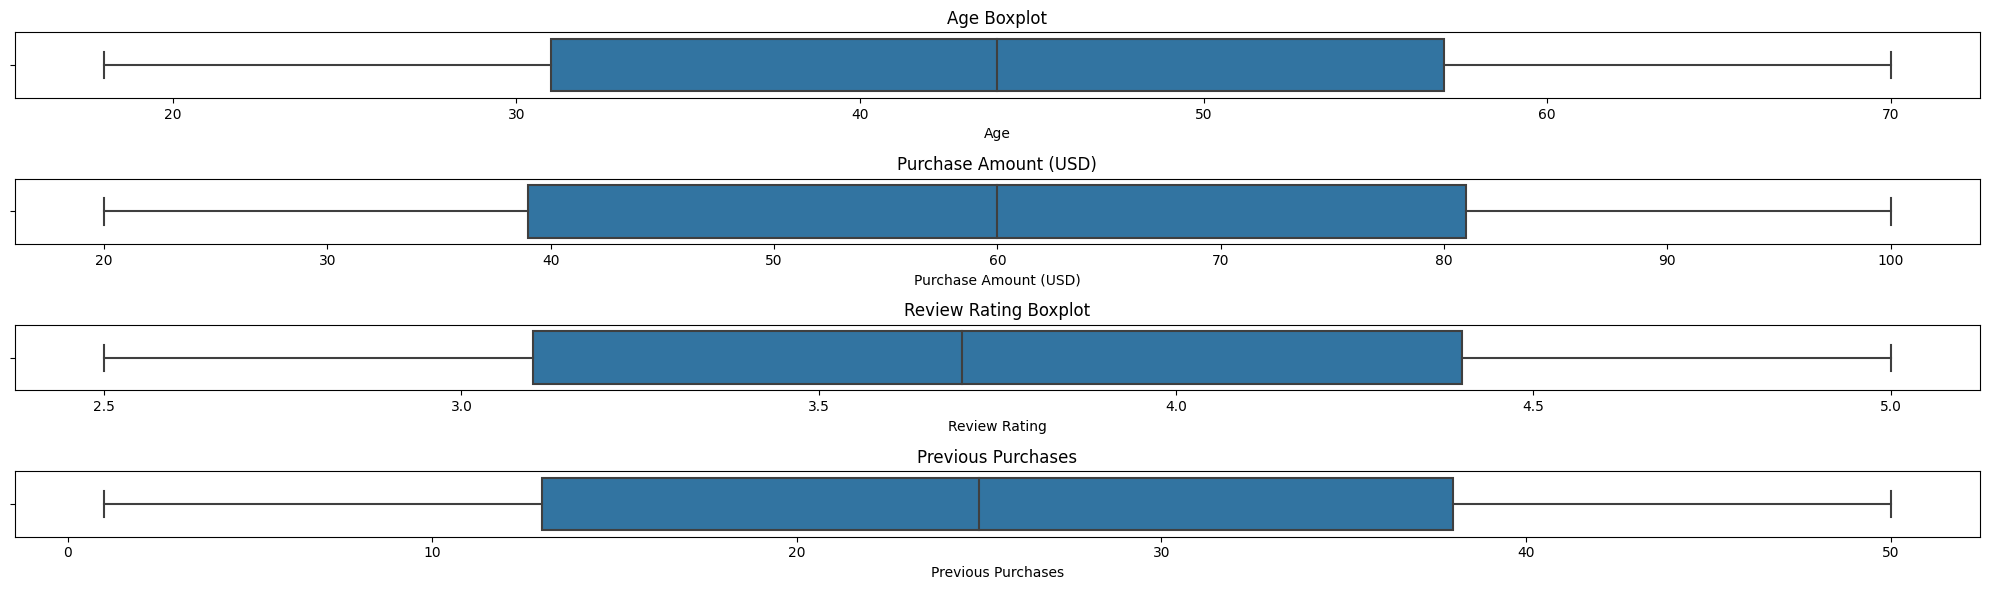

In [19]:
#Plotting boxplot on numerical values
f, ax = plt.subplots(4,1, figsize = (20,6))
sns.boxplot(df['Age'], ax=ax[0])
ax[0].set_title('Age Boxplot')

sns.boxplot(df['Purchase Amount (USD)'], ax=ax[1])
ax[1].set_title('Purchase Amount (USD)')

sns.boxplot(df['Review Rating'], ax=ax[2])
ax[2].set_title('Review Rating Boxplot')

sns.boxplot(df['Previous Purchases'], ax=ax[3])
ax[3].set_title('Previous Purchases')

plt.tight_layout()
plt.show()

#### Core Function

In [20]:
#TO check the list of columns
df.columns.to_list()

['Age',
 'Gender',
 'Item Purchased',
 'Category',
 'Purchase Amount (USD)',
 'Location',
 'Size',
 'Color',
 'Season',
 'Review Rating',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Previous Purchases',
 'Payment Method',
 'Frequency of Purchases']

In [21]:
#Academic purposes
def column_counts(df=df):
    """
        Ask for the input from user to get the specific value counts
        param1: DataFrame
    """
    try:
        columns = df.columns.to_list()
        print(f"Columns from dataset {columns}")
        input_column = input("Enter a column to view the value counts: ")
        
        if input_column in columns:
            print(f"\n{df[input_column].value_counts()}")
            
        else:
            print("Column not found")
    except Exception as e:
        print("Column not found")
        print(e)


In [22]:
column_counts()

Columns from dataset ['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Payment Method', 'Frequency of Purchases']
Enter a column to view the value counts: Age

69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: Age, dtype: int64


In [23]:
# Get the count in categories
df['Category'].value_counts()

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

In [24]:
# Get the unique value from color
df['Color'].unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

In [25]:
# Get the number of unique values
df['Color'].nunique()

25

In [26]:
def color_to_letter(color):
    """
        Convert color to specfic code
        param1: String
    """
    color_dict = {
        "Gray": "G",
        "Maroon": "M",
        "Turquoise": "T1",
        "White": "W",
        "Charcoal": "C1",
        "Silver": "S",
        "Pink": "P1",
        "Purple": "P2",
        "Olive": "O",
        "Gold": "G1", 
        "Violet": "V",
        "Teal": "T2",
        "Lavender": "L",
        "Black": "B1",
        "Green": "G2",
        "Peach": "P3",
        "Red": "R",
        "Cyan": "C2",
        "Brown": "B2",
        "Beige": "B3",
        "Orange": "O2",
        "Indigo": "I",
        "Yellow": "Y",
        "Magenta": "M",
        "Blue": "B4"   
    }
    
    try:
        return color_dict[color]
    except KeyError:
        return "N"

In [27]:
#Convert color to letter and get the top 5 rows
df['Color'].apply(color_to_letter).head(5)

Customer ID
1     G
2     M
3     M
4     M
5    T1
Name: Color, dtype: object

In [28]:
#Get the count of payment method
df['Payment Method'].value_counts()

PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: Payment Method, dtype: int64

In [29]:
def pay_in_bank(method):
    """
        To get only method listed from dataset
    """
    lst = ["Credit card", "Debit Card", "Bank Transfer"]
    if method in lst:
        return method
    else:
        return None

In [30]:
#Apply function to payment method and drop none value and get top 5 rows
df['Payment Method'].apply(pay_in_bank).dropna().head(5)

Customer ID
11    Bank Transfer
12    Bank Transfer
15       Debit Card
17       Debit Card
20       Debit Card
Name: Payment Method, dtype: object

In [31]:
#Filtering target audience for bank
lst = ["Credit Card", "Debit Card", "Bank Transfer"]
df[df["Payment Method"].isin(lst)].head(10)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
11,53,Male,Shoes,Footwear,34,Arkansas,L,Purple,Fall,4.1,Yes,Store Pickup,Yes,Yes,26,Bank Transfer,Bi-Weekly
12,30,Male,Shorts,Clothing,68,Hawaii,S,Olive,Winter,4.9,Yes,Store Pickup,Yes,Yes,10,Bank Transfer,Fortnightly
15,64,Male,Coat,Outerwear,53,New York,L,Teal,Winter,4.7,Yes,Free Shipping,Yes,Yes,34,Debit Card,Weekly
17,25,Male,Sunglasses,Accessories,36,Alabama,S,Gray,Spring,4.1,Yes,Next Day Air,Yes,Yes,44,Debit Card,Bi-Weekly
20,66,Male,Pants,Clothing,90,Rhode Island,M,Green,Summer,3.3,Yes,Standard,Yes,Yes,46,Debit Card,Bi-Weekly
22,31,Male,Pants,Clothing,62,North Carolina,M,Charcoal,Winter,4.1,Yes,Store Pickup,Yes,Yes,22,Debit Card,Quarterly
23,56,Male,Pants,Clothing,37,California,M,Peach,Summer,3.2,Yes,Store Pickup,Yes,Yes,32,Debit Card,Annually


In [32]:
frame = df[df["Payment Method"].isin(lst)]
print(frame["Payment Method"].unique()) #Double check
frame.describe()

['Credit Card' 'Bank Transfer' 'Debit Card']


,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,1919.000000,1919.000000,1919.000000,1919.000000
mean,44.202189,60.237624,3.749297,25.232934
std,15.367577,23.575690,0.721420,14.452231
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,61.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,37.500000
max,70.000000,100.000000,5.000000,50.000000


In [33]:
# Get the count of gender
df['Gender'].value_counts()

Male      2652
Female    1248
Name: Gender, dtype: int64

#### Aggregation

In [34]:
item_avg_review = df.groupby(['Item Purchased']).agg({"Review Rating": 'mean'})
item_avg_review

,Review Rating
Item Purchased,
Backpack,3.752448
Belt,3.761491
Blouse,3.683626
Boots,3.812500
Coat,3.730435
Dress,3.754819
Gloves,3.864286
Handbag,3.775163
Hat,3.806494


In [35]:
item_sales = df.groupby(['Category']).agg({"Purchase Amount (USD)": 'sum'})
item_sales

,Purchase Amount (USD)
Category,
Accessories,74200
Clothing,104264
Footwear,36093
Outerwear,18524


In [36]:
# Groupby by location
location = df.groupby("Location")

# Summary statistic of all countries
location.describe().head()

Age                                                       \
           count       mean        std   min    25%   50%   75%   max   
Location                                                                
Alabama     89.0  44.314607  15.269991  18.0  33.00  45.0  58.0  68.0   
Alaska      72.0  43.000000  15.577159  18.0  29.75  42.0  57.0  70.0   
Arizona     65.0  45.276923  14.388046  19.0  34.00  44.0  57.0  70.0   
Arkansas    79.0  44.101266  16.565019  18.0  30.00  43.0  61.5  70.0   
California  95.0  42.663158  14.502832  19.0  28.50  43.0  56.0  70.0   

           Purchase Amount (USD)             ... Review Rating       \
                           count       mean  ...           75%  max   
Location                                     ...                      
Alabama                     89.0  59.112360  ...          4.30  5.0   
Alaska                      72.0  67.597222  ...          4.50  5.0   
Arizona                     65.0  66.553846  ...          4.40  4.9   
Arkansas                    79.0  61.113924  ...          4.35  5.0   
California                  95.0  59.000000  ...          4.45  5.0   

           Previous Purchases                                                \
                        count       mean        std  min    25%   50%   75%   
Location                                                                      
Alabama                  89.0  27.449438  14.735556  1.0  16.00  29.0  41.0   
Alaska                   72.0  28.097222  14.083413  3.0  14.75  30.0  40.0   
Arizona                  65.0  28.369231  15.692922  2.0  14.00  29.0  43.0   
Arkansas                 79.0  27.063291  14.862051  1.0  14.00  28.0  39.5   
California               95.0  24.494737  15.000620  1.0  12.00  24.0  36.0   

                  
             max  
Location          
Alabama     49.0  
Alaska      50.0  
Arizona     50.0  
Arkansas    49.0  
California  50.0  

[5 rows x 32 columns]

### Feature Selection & Engineering

In [37]:
# Aggregate numerical variables by functions
category_target = df.groupby(['Category', 'Season'], as_index=False).agg({'Purchase Amount (USD)': 'sum',
                             'Age': 'mean',
                             'Previous Purchases': 'sum',
                             'Review Rating': 'mean'
                            })
category_target

,Category,Season,Purchase Amount (USD),Age,Previous Purchases,Review Rating
0,Accessories,Fall,19874,44.351852,7987,3.743519
1,Accessories,Spring,17007,43.601329,7809,3.820598
2,Accessories,Summer,19028,44.926282,8363,3.768590
3,Accessories,Winter,18291,43.983498,7741,3.743894
4,Clothing,Fall,26220,44.402810,10869,3.703747
5,Clothing,Spring,27692,44.977974,11241,3.763436
6,Clothing,Summer,23078,43.176471,9980,3.686765
7,Clothing,Winter,27274,42.533482,11681,3.733929
8,Footwear,Fall,8665,44.919118,3344,3.837500
9,Footwear,Spring,9555,45.030675,3939,3.793865


In [38]:
# Perform filter to get footwear from category
footwear = category_target[category_target['Category']=='Footwear']
footwear

,Category,Season,Purchase Amount (USD),Age,Previous Purchases,Review Rating
8,Footwear,Fall,8665,44.919118,3344,3.837500
9,Footwear,Spring,9555,45.030675,3939,3.793865
10,Footwear,Summer,9393,44.487500,4098,3.727500
11,Footwear,Winter,8480,43.242857,3733,3.813571


In [39]:
# category_by_season = df.groupby(['Category', 'Season'], as_index=False).agg({
#     'Purchase Amount (USD)': 'count',
# })

category_by_season = df.groupby(
    ['Category', 'Season'])['Purchase Amount (USD)'].agg(
    [('No. of orders', 'count'),
     ('Sales', 'sum')
    ]).reset_index()

category_by_season

,Category,Season,No. of orders,Sales
0,Accessories,Fall,324,19874
1,Accessories,Spring,301,17007
2,Accessories,Summer,312,19028
3,Accessories,Winter,303,18291
4,Clothing,Fall,427,26220
5,Clothing,Spring,454,27692
6,Clothing,Summer,408,23078
7,Clothing,Winter,448,27274
8,Footwear,Fall,136,8665
9,Footwear,Spring,163,9555


In [40]:
#Group sales by season & category
season_sales = df.groupby(
        ['Season','Category'])['Purchase Amount (USD)'].agg(
        [
         ('Sales', 'sum')
        ]).reset_index()
season_sales.sort_values(['Season', 'Sales'], ascending=[True, False], inplace=True)
season_sales

,Season,Category,Sales
1,Fall,Clothing,26220
0,Fall,Accessories,19874
2,Fall,Footwear,8665
3,Fall,Outerwear,5259
5,Spring,Clothing,27692
4,Spring,Accessories,17007
6,Spring,Footwear,9555
7,Spring,Outerwear,4425
9,Summer,Clothing,23078
8,Summer,Accessories,19028


In [41]:
#Expanding categorical into multiple columns
#Purpose: To plot a stacked bar chart shown in belows
season_sales_pivot = season_sales.pivot(index="Season", columns = 'Category', values='Sales')

In [42]:
#Suscription Sales
df.groupby(['Subscription Status'], as_index=False).agg(
    {
        'Purchase Amount (USD)': 'sum'                       
    }).rename(columns= {'Purchase Amount (USD)':'Total Sales (USD)'})

,Subscription Status,Total Sales (USD)
0,No,170436
1,Yes,62645


In [43]:
#Analyse Customer behavior
customer_behaviour = df.groupby(['Frequency of Purchases', 'Discount Applied', 'Promo Code Used'], as_index=False).agg(
    {
        'Purchase Amount (USD)': 'count',
         'Previous Purchases': 'sum',
    }).rename(columns= {'Purchase Amount (USD)':'Number of Purchases'})
customer_behaviour

,Frequency of Purchases,Discount Applied,Promo Code Used,Number of Purchases,Previous Purchases
0,Annually,No,No,334,8014
1,Annually,Yes,Yes,238,6035
2,Bi-Weekly,No,No,321,7793
3,Bi-Weekly,Yes,Yes,226,5766
4,Every 3 Months,No,No,326,8102
5,Every 3 Months,Yes,Yes,258,6475
6,Fortnightly,No,No,299,7256
7,Fortnightly,Yes,Yes,243,6441
8,Monthly,No,No,316,8021
9,Monthly,Yes,Yes,237,5958


In [44]:
# product_detail = df.groupby(
#     ['Category', 'Item Purchased'], as_index=False).agg(
#         {
#             'Purchase Amount (USD)': 'sum',
#             'Purchase Amount (USD)': 'count',
#         })
#https://stackoverflow.com/questions/53645894/groupby-with-multiple-columns-with-addition-and-frequency-counts-in-pandas

# Group no of orders & sales by category & item purchased
product_detail = df.groupby(
    ['Category', 'Item Purchased'], sort=False)['Purchase Amount (USD)'].agg(
    [('No. of orders', 'count'),
     ('Sales', 'sum')
    ]).reset_index()
product_detail

,Category,Item Purchased,No. of orders,Sales
0,Clothing,Blouse,171,10410
1,Clothing,Sweater,164,9462
2,Clothing,Jeans,124,7548
3,Footwear,Sandals,160,9200
4,Footwear,Sneakers,145,8635
5,Clothing,Shirt,169,10332
6,Clothing,Shorts,157,9433
7,Outerwear,Coat,161,9275
8,Accessories,Handbag,153,8857
9,Footwear,Shoes,150,9240


### Visualisation

In this project, we will utilise different plots such as bar plots, histogram, heat map, scatter plot.

#### Bar Plots

In [45]:
# Generate a color map
num_categories = len(df['Category'].value_counts())
colors = [plt.cm.viridis(random.random()) for _ in range(num_categories)]

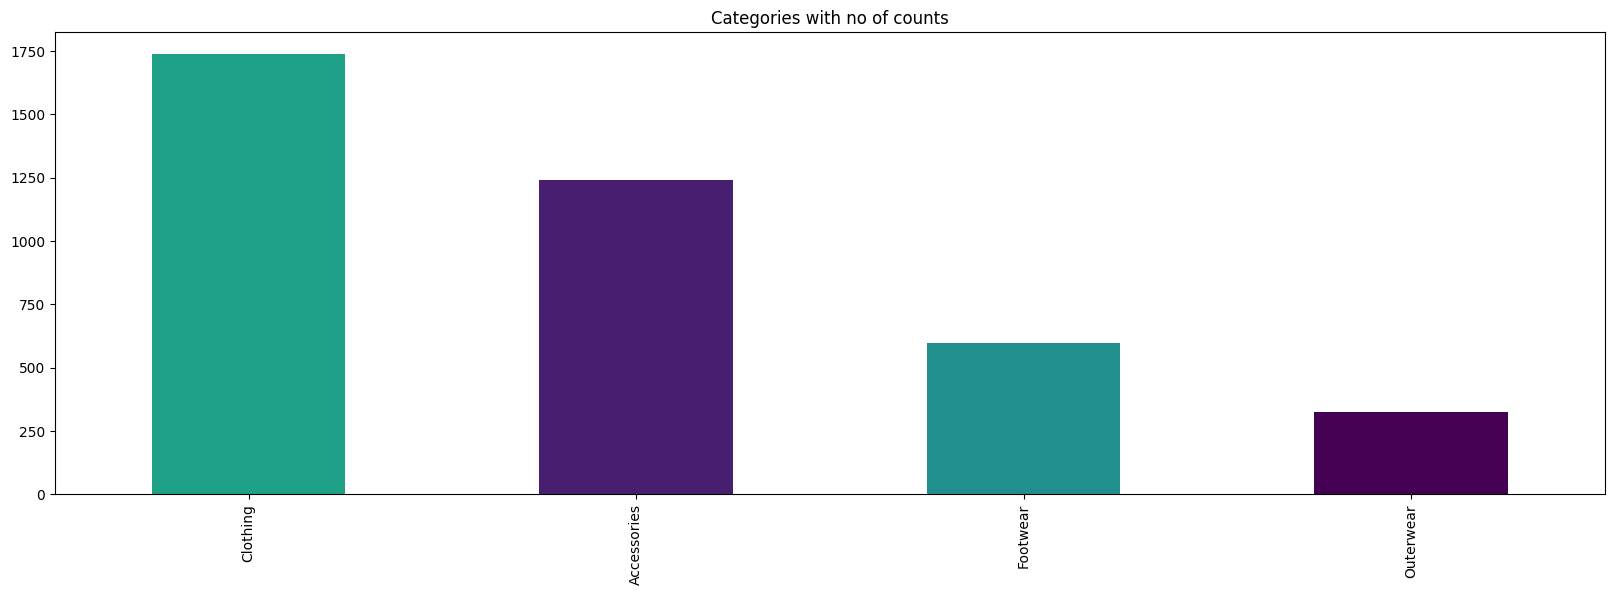

In [46]:
# Change Plot Size in Matplotlib
plt.figure(figsize=(20, 6)) 

# Plot bar chart
df['Category'].value_counts().plot(kind='bar', color= colors)
plt.title('Categories with no of counts');

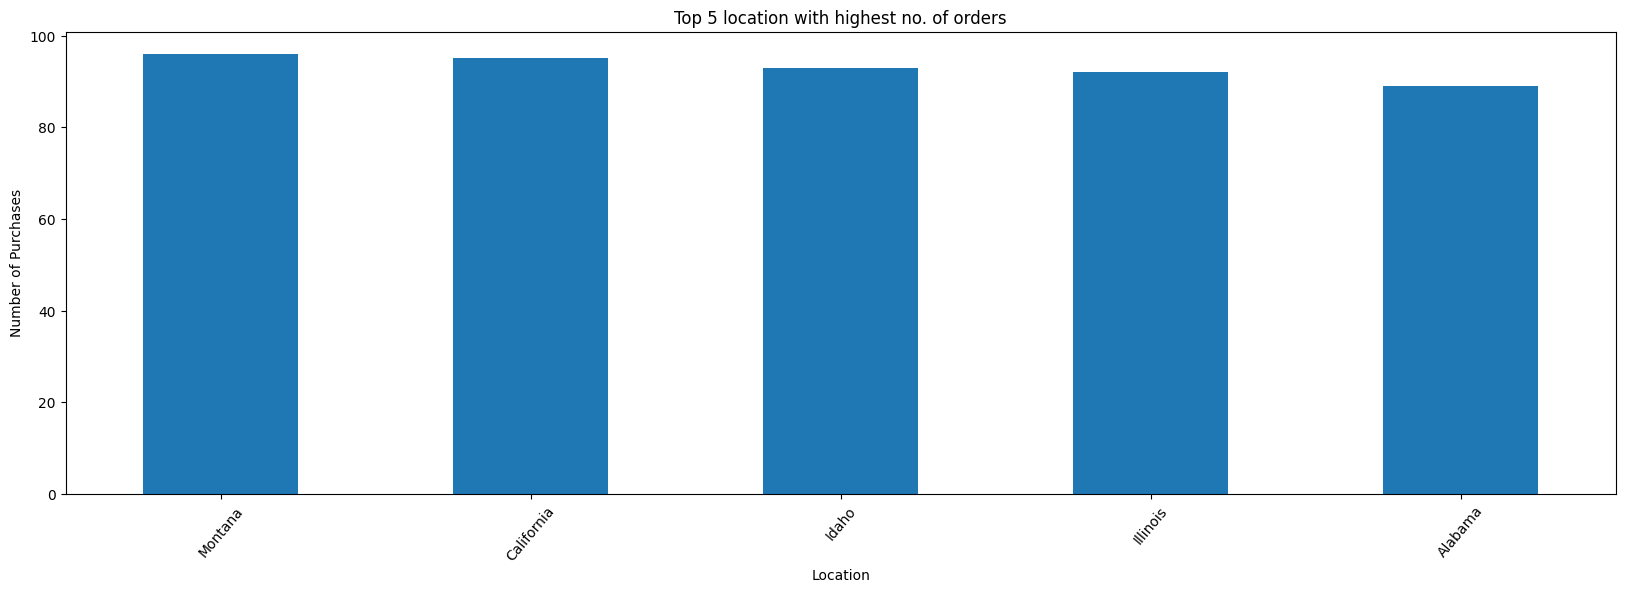

In [47]:
plt.figure(figsize=(20,6))

#Sort location by number of purchases in descending order and get top 5 values
location.size().sort_values(ascending=False).head(5).plot.bar()

#Setting x-axis into 50 degree
plt.xticks(rotation=50)
plt.xlabel("Location")
plt.ylabel("Number of Purchases")
plt.title("Top 5 location with highest no. of orders")
plt.show()

Text(0.5, 1.0, 'Total Sales on each category')

<Figure size 2000x600 with 0 Axes>

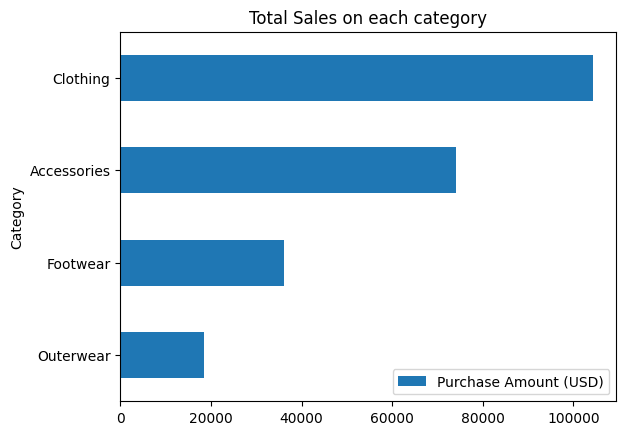

In [48]:
plt.figure(figsize=(20, 6)) 
item_sales = item_sales.sort_values('Purchase Amount (USD)', ascending=True)
item_sales.plot(kind="barh")
plt.title("Total Sales on each category")

In [49]:
df.groupby(['Category'])[['Purchase Amount (USD)', 'Age', 'Previous Purchases', 'Review Rating']].mean()

,Purchase Amount (USD),Age,Previous Purchases,Review Rating
Category,,,,
Accessories,59.838710,44.224194,25.725806,3.768629
Clothing,60.025331,43.782959,25.199194,3.723143
Footwear,60.255426,44.442404,25.232053,3.790651
Outerwear,57.172840,44.311728,24.956790,3.746914


Text(0.5, 1.0, 'Comparision by Category')

<Figure size 2000x600 with 0 Axes>

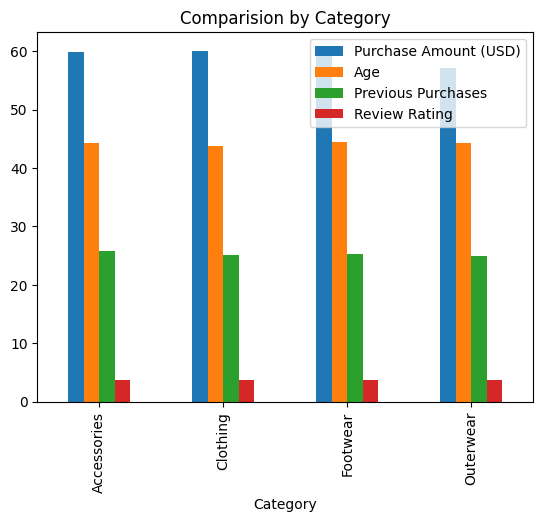

In [50]:
#Simply plot stacked bar chart to all categorical variables
#Problem 1: units are not consistent
plt.figure(figsize=(20, 6)) 
df.groupby(['Category'])[['Purchase Amount (USD)', 'Age', 'Previous Purchases', 'Review Rating']].mean().plot(kind="bar")
plt.title("Comparision by Category")

<Figure size 2000x600 with 0 Axes>

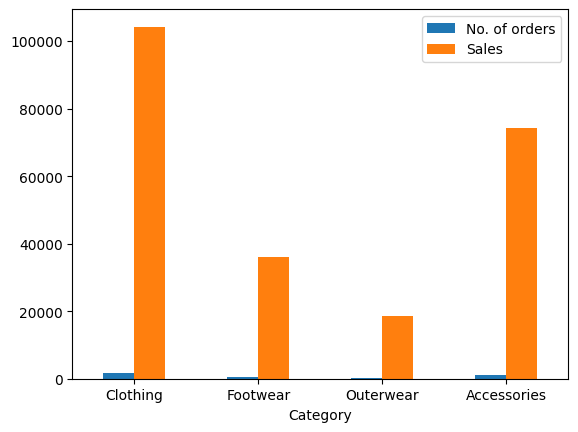

In [51]:
plt.figure(figsize=(20, 6)) 

df.groupby(
    ['Category'], sort=False)['Purchase Amount (USD)'].agg(
    [('No. of orders', 'count'),
     ('Sales', 'sum')
    ]).plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

<Figure size 2000x600 with 0 Axes>

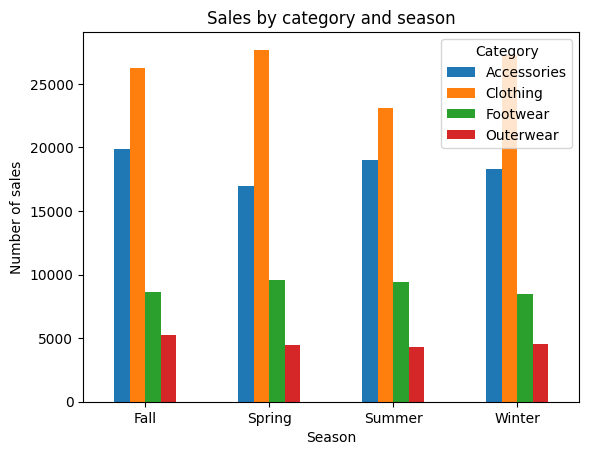

In [52]:
plt.figure(figsize=(20, 6)) 
season_sales_pivot.plot(kind="bar")
plt.title("Sales by category and season")
plt.ylabel("Number of sales")
plt.xticks(rotation=0)
plt.show()

#### Histogram

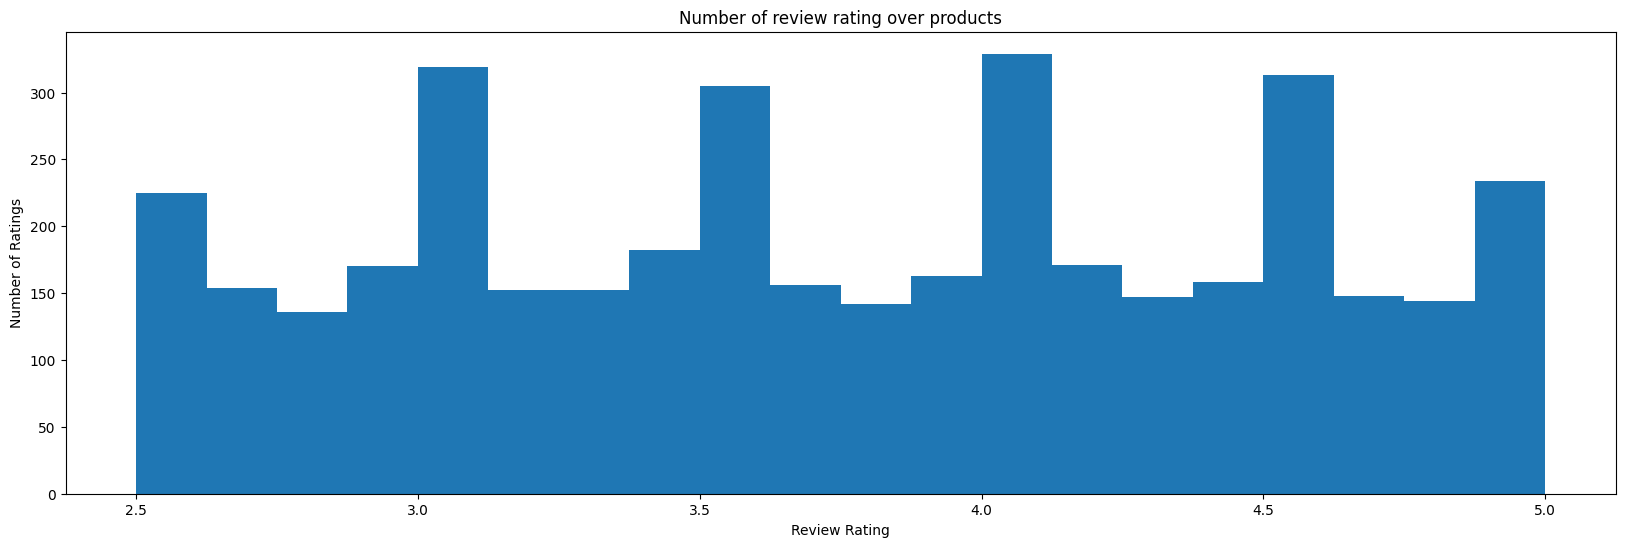

In [53]:
plt.figure(figsize=(20, 6)) 
df['Review Rating'].plot(kind='hist', bins=20)
plt.ylabel('Number of Ratings')
plt.xlabel('Review Rating')
plt.title('Number of review rating over products');

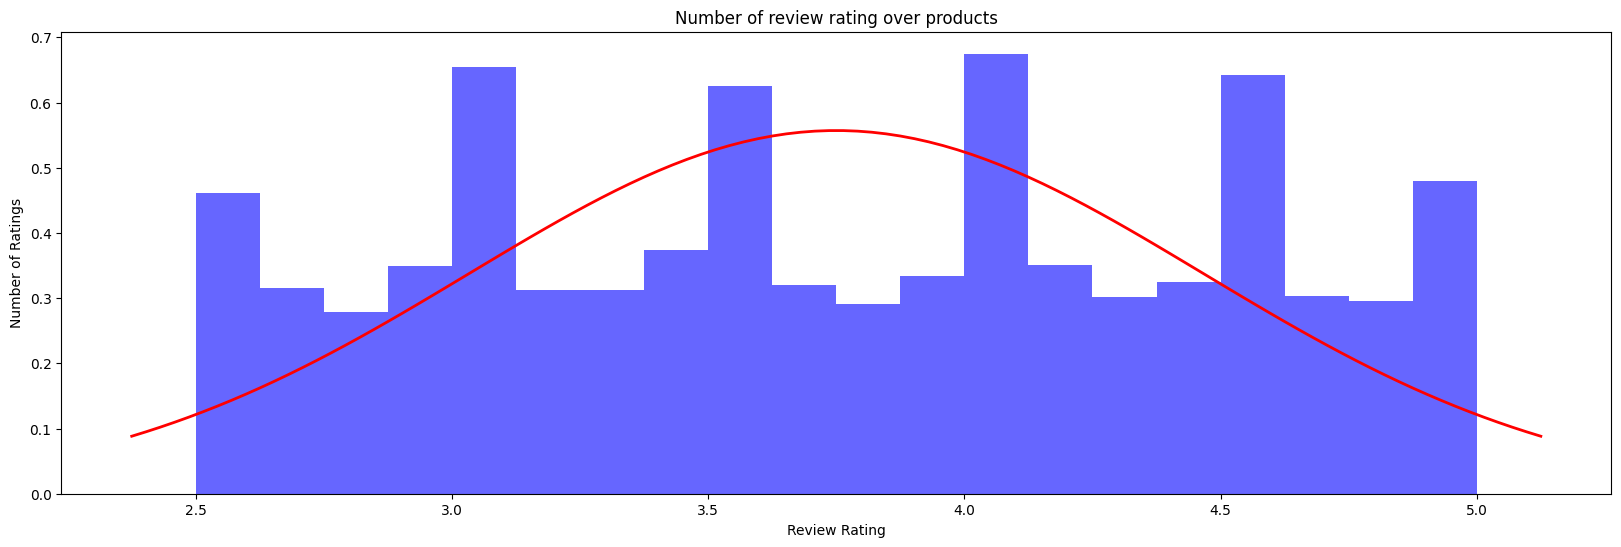

In [54]:
# https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/

from scipy.stats import norm

plt.figure(figsize=(20, 6)) 

data = df['Review Rating']

# Calculate mean and stardard deviation
mu, std = norm.fit(data)

plt.hist(data, bins=20, density=True, alpha=0.6, color='b') 


# Ploting the curve line
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, color='red')
plt.ylabel('Number of Ratings')
plt.xlabel('Review Rating')
plt.title('Number of review rating over products')

plt.show()

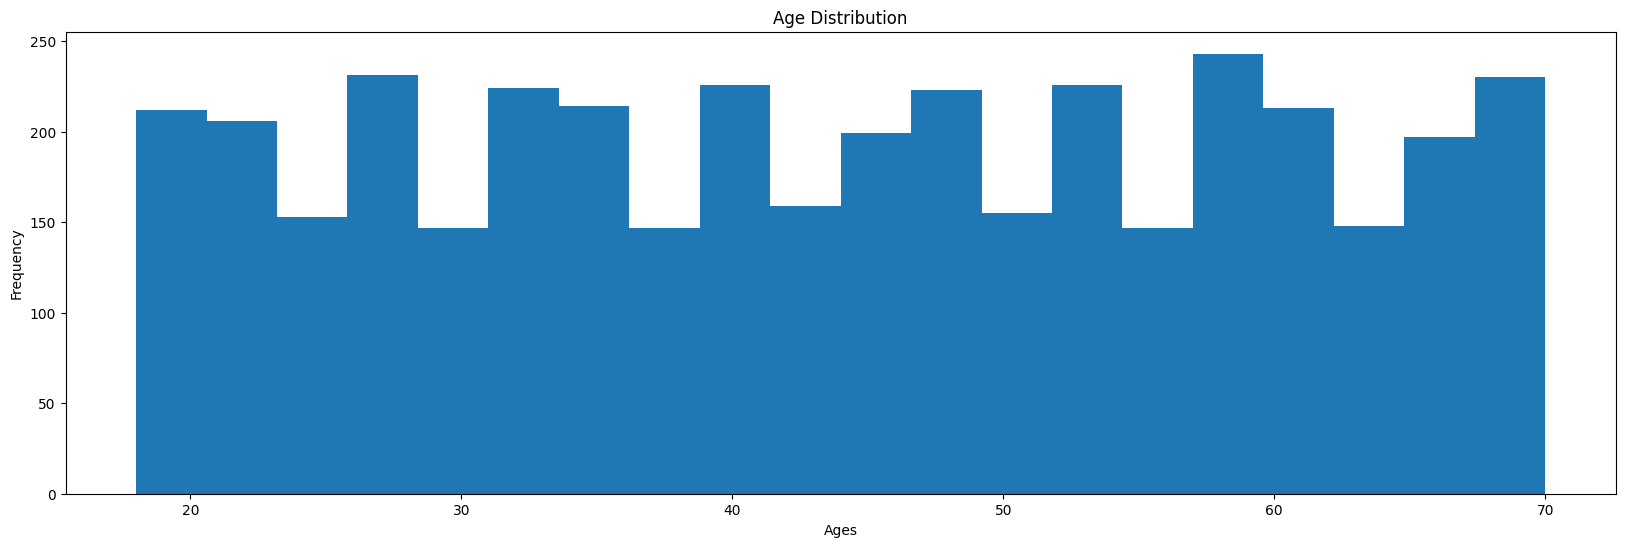

In [55]:
plt.figure(figsize=(20, 6)) 
df['Age'].plot(kind='hist', bins=20)
plt.ylabel('Frequency')
plt.xlabel('Ages')
plt.title('Age Distribution');

#### Heat Map

/var/folders/gq/nf98s58d705cw4p162k5rth80000gn/T/ipykernel_42421/892161677.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)


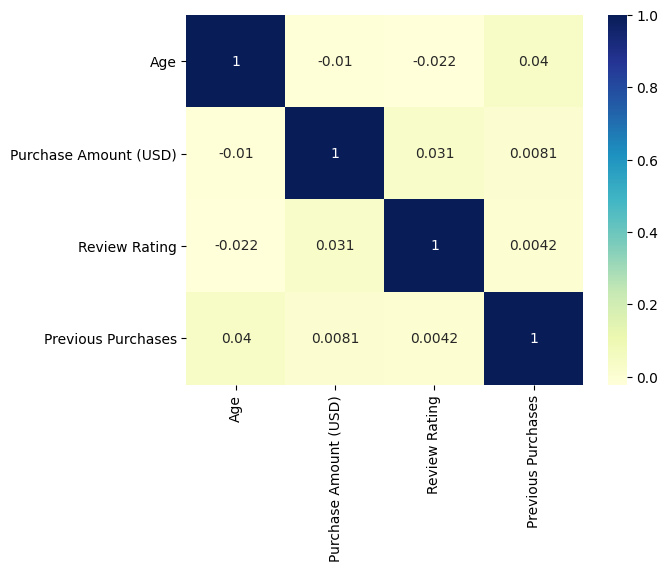

In [56]:
import seaborn as sb
import matplotlib.pyplot as mp

# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

#### Scatter plots
Use to visualize the relationship between two numeric variables.

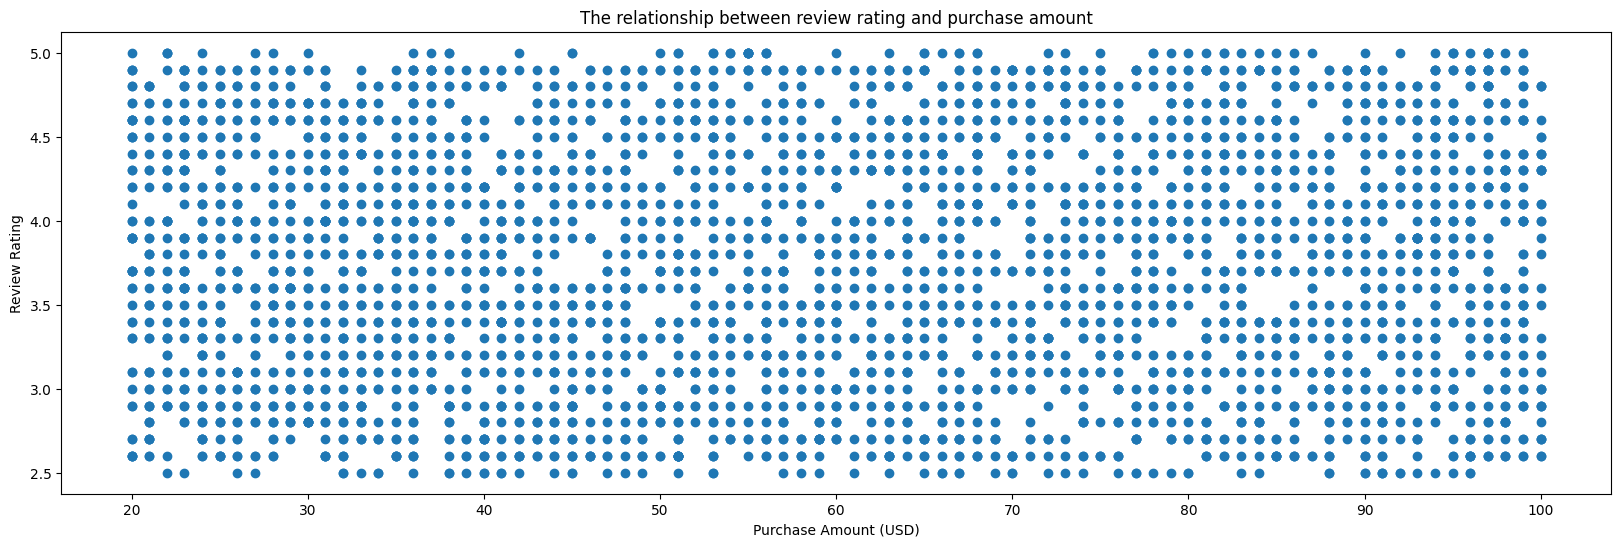

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 6))
x = df['Purchase Amount (USD)']
y = df['Review Rating']

plt.ylabel('Review Rating')
plt.xlabel('Purchase Amount (USD)')
plt.title('The relationship between review rating and purchase amount');
plt.scatter(x, y)
plt.show()

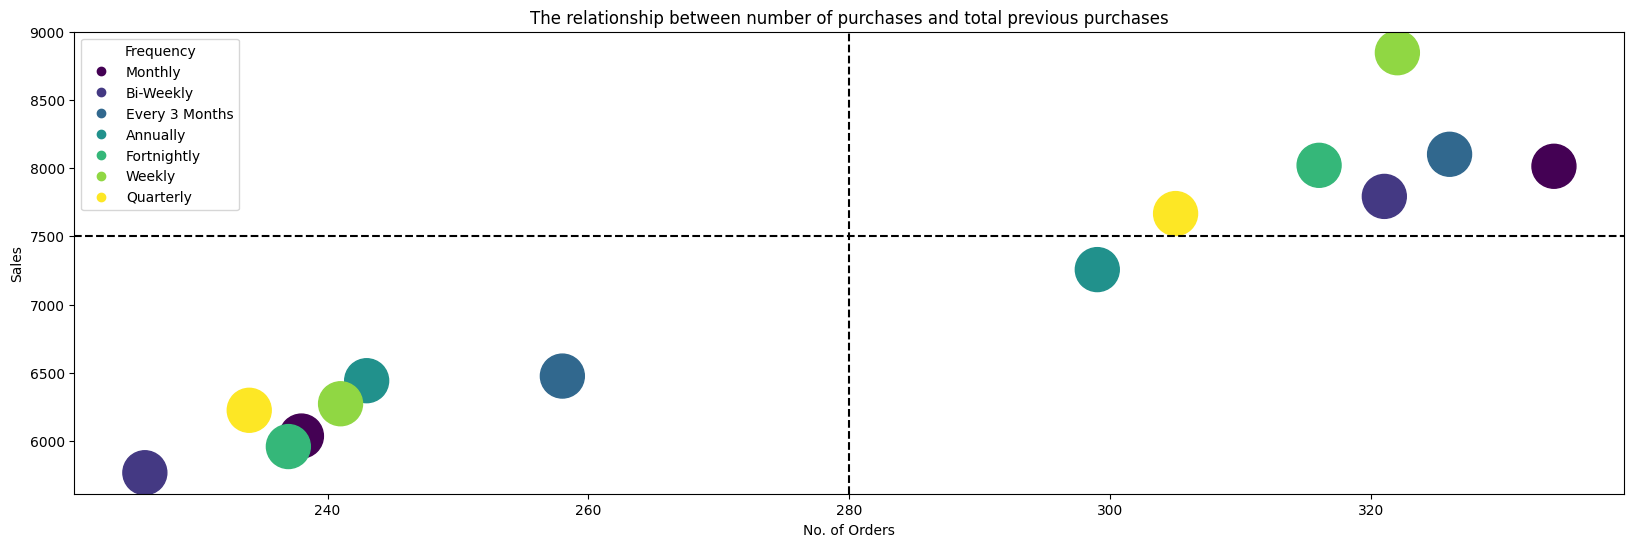

In [58]:
#Customer_behaviour
plt.figure(figsize = (20, 6))
x = customer_behaviour['Number of Purchases']
y = customer_behaviour['Previous Purchases']
frequency = list(set(customer_behaviour['Frequency of Purchases']))

plt.xlabel('No. of Orders')
plt.ylabel('Sales')
plt.title('The relationship between number of purchases and total previous purchases');
scatter = plt.scatter(x, 
            y, 
            c=customer_behaviour['Frequency of Purchases'].astype('category').cat.codes,         
            s = 1000)
plt.legend(handles=scatter.legend_elements()[0], 
           labels=frequency,
           title="Frequency",
          )

# adding vertical line in data co-ordinates 
plt.axvline(280, c='black', ls='--') 
  
# adding horizontal line in data co-ordinates 
plt.axhline(7500, c='black', ls='--') 

plt.show()

#### Bubble Plot

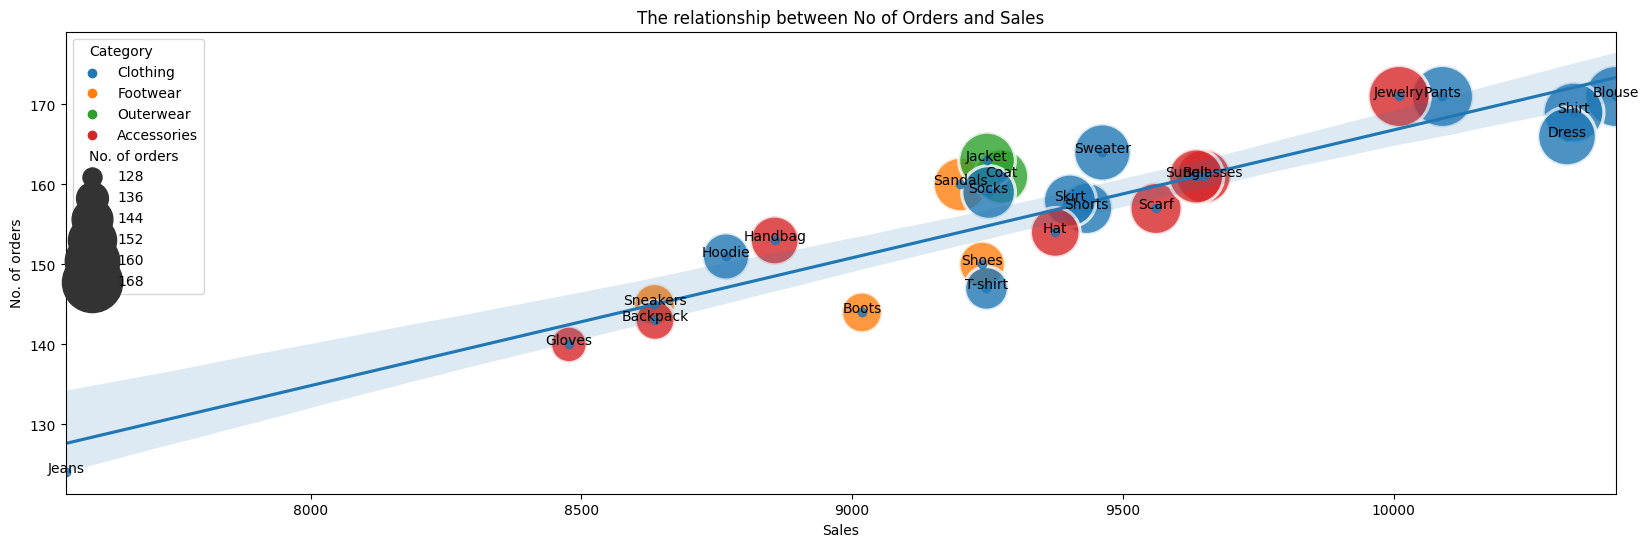

In [59]:
plt.figure(figsize = (20, 6))
x = product_detail['Sales']
y = product_detail['No. of orders']

plt.xlabel('Sales')
plt.ylabel('No. of orders')
plt.title('The relationship between No of Orders and Sales');
ax = sns.scatterplot(x=x, 
                          y=y, 
                          hue = "Category", 
                          size="No. of orders", 
                          sizes=(20, 2000),
                          alpha=0.8,
                          data =product_detail)

#plot linear regression between x and y
sns.regplot(x = x, y = y)

#For each point, we add a text inside the bubble
for line in range(0,product_detail.shape[0]):
     ax.text(x[line], y[line], product_detail['Item Purchased'][line], horizontalalignment='center')
        

#### Line Chart

A chart to show the movement over the time. 

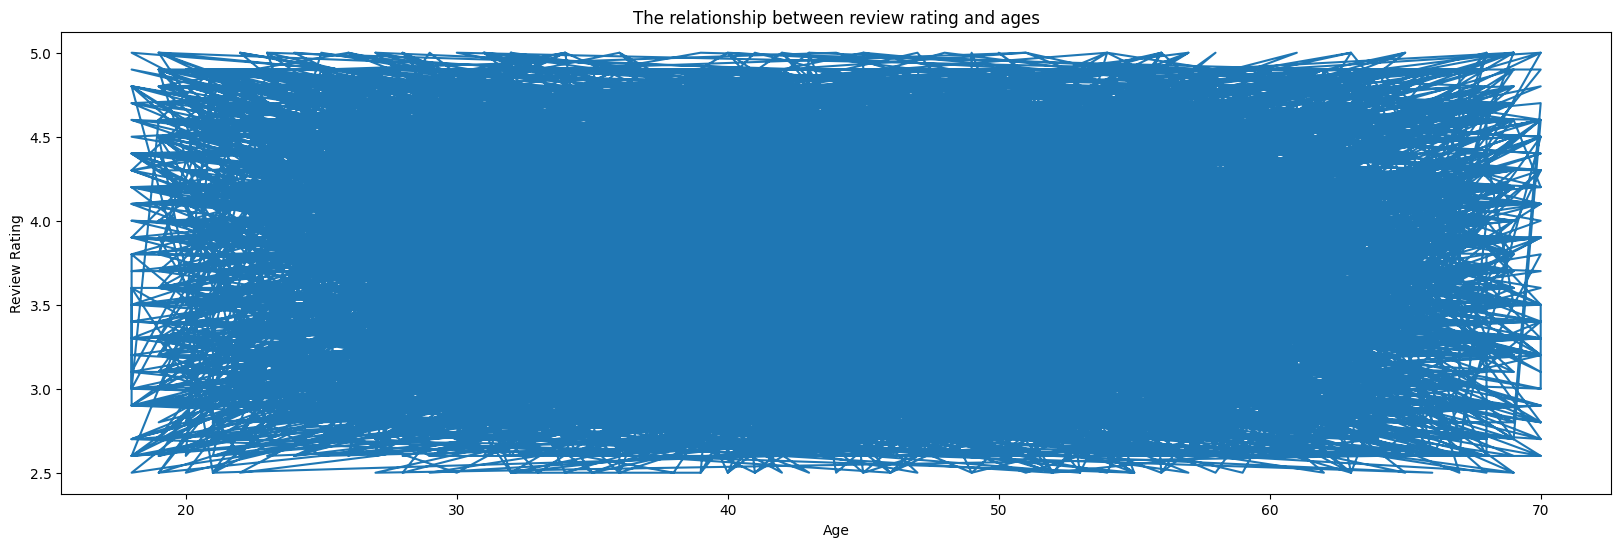

In [60]:
plt.figure(figsize = (20, 6))
x = df['Age']
y = df['Review Rating']

plt.xlabel('Age')
plt.ylabel('Review Rating')

plt.title('The relationship between review rating and ages');
plt.plot(x, y)
plt.show()

##### Comments:
Line chart is not suitable for this dataset because it requires time series. It should be used to see the movement over time. 

#### Pie Charts

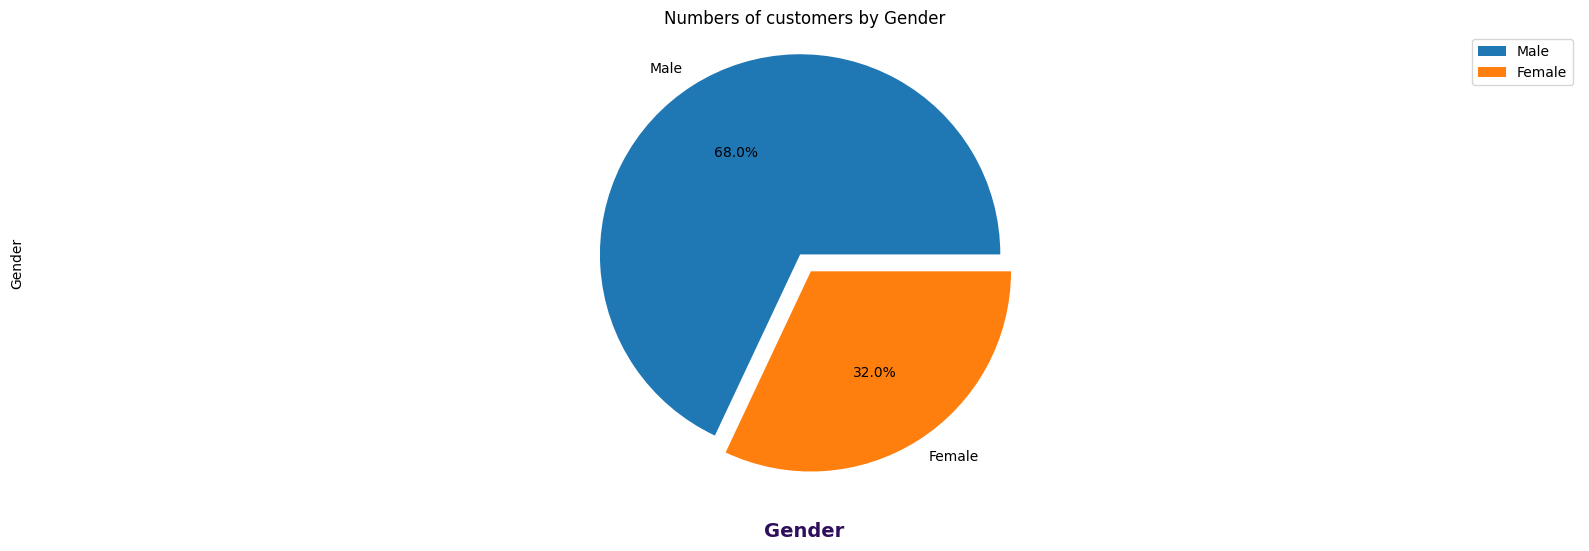

In [61]:
plt.figure(figsize = (20, 6))
explode = (0, 0.1)

counts = df['Gender'].value_counts()

counts.plot(kind='pie', explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.title("Numbers of customers by Gender")
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

<Figure size 2000x600 with 0 Axes>

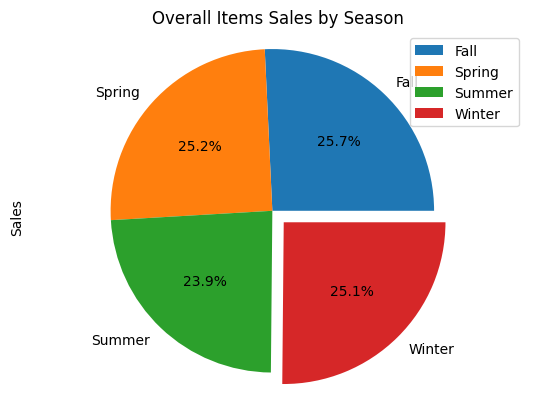

In [64]:
#Demand according to season
plt.figure(figsize = (20, 6))

season_sale = df.groupby(['Season']).agg({"Purchase Amount (USD)": 'sum'}).rename(columns= {"Purchase Amount (USD)": "Sales"})
season_sale.plot.pie(y='Sales', explode = (0, 0, 0, 0.1), autopct = '%1.1f%%')
plt.title("Overall Items Sales by Season")
plt.axis('equal')
plt.show()

#### WordClouds

In [65]:
#Combining Data
text = " ".join(title for title in df["Location"])
print ("There are {} words in the combination of all location.".format(len(text)))

There are 36770 words in the combination of all location.


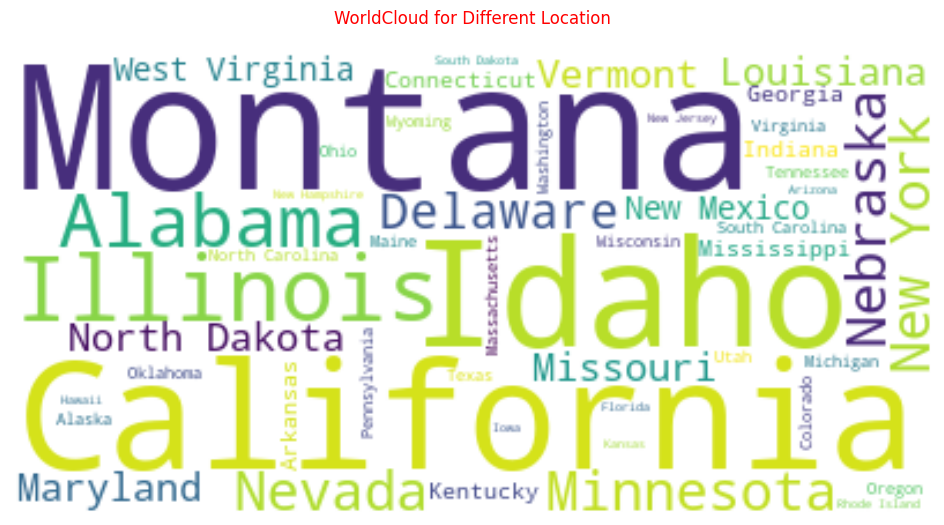

In [66]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create and generate a word cloud image:
# wordcloud = WordCloud(collocations = False, background_color = 'white').generate(text)
word_cloud = WordCloud(background_color = 'white').generate(text)

# Display the generated image:
plt.figure(figsize = (15, 6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('WorldCloud for Different Location\n', fontsize = 12, color = "#FF0000")
plt.show()

#### Choropleth map with Python and Folium

Links:
- https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/us-states.json
- https://blog.prepscholar.com/average-sat-scores-by-state-most-recent
- https://austinlasseter.medium.com/using-folium-to-generate-a-simple-map-of-your-pandas-data-87ddc5d55f8d
- https://python-graph-gallery.com/292-choropleth-map-with-folium/
- https://stackoverflow.com/questions/63865264/folium-black-colored-countries
- https://realpython.com/python-folium-web-maps-from-data/

In [67]:
# Getting the number of order by location
state_order = pd.DataFrame(location.size().sort_values(ascending=False))

In [68]:
# Reset index as location are used as index but we need to visualize on the map using location name
state_order.columns = ['Orders']
state_order = state_order.reset_index()

In [69]:
state_order.head(5)

,Location,Orders
0,Montana,96
1,California,95
2,Idaho,93
3,Illinois,92
4,Alabama,89


In [70]:
# Read in our map:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/main/examples/data"
)
my_USA_map = f"{url}/us-states.json"

In [71]:
map = folium.Map(location=[48, -102], zoom_start=3)
map.choropleth(geo_data=my_USA_map, data=state_order,
            columns=['Location', 'Orders'],
            key_on="feature.properties.name",
            fill_color="YlGn",
            fill_opacity=0.7,
            line_opacity=.1,
            legend_name="No. of orders")
map

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


### References:
1. https://www.datacamp.com/tutorial/wordcloud-python
2. https://www.kaggle.com/code/iamsouravbanerjee/getting-started-with-shopping-trends-beginners/notebook
3. https://www.geeksforgeeks.org/pandas-groupby-multiple-values-and-plotting-results/
4. https://stackoverflow.com/questions/21090316/plotting-pandas-dataframes-in-to-pie-charts-using-matplotlib
5. https://www.statology.org/pandas-filter-in-list/
6. https://stackoverflow.com/questions/53645894/groupby-with-multiple-columns-with-addition-and-frequency-counts-in-pandas
7. https://python-graph-gallery.com/bubble-plot-with-seaborn/
8. https://datascience.stackexchange.com/questions/44995/is-there-a-way-to-label-annotate-my-bubble-plot-scatter-plot-with-a-z-axis-on
9. https://chartexpo.com/blog/how-to-create-a-scatter-plot-in-excel-with-3-variables#scatter-plot-3-variables
10. https://python-charts.com/correlation/scatter-plot-regression-line-seaborn/